<a href="https://colab.research.google.com/github/AyushSinghRaghuwanshi/Handwritten-Digit-Recognition-on-MNIST/blob/main/Handwritten_Digit_Recognition_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [4]:
x,y = mnist['data'], mnist['target']

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt


In [23]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

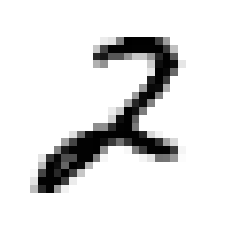

In [24]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('Off')

In [25]:
x_train, X_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [26]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [27]:
#Creating a 2 detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)
y_test_2

array([False,  True, False, ..., False, False, False])

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
clf.predict([some_digit])

array([ True])

In [31]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train,y_train_2,cv=3,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [32]:
a.mean()

0.9164666666666667